In [226]:
import numpy as np
import sys
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import pickle

In [29]:
path = "./exp_save/"
dataset = ["MNIST", "FashionMNIST", "CIFAR10"]
model1 = ["NN", "Net"] 
model2 = ["c3f2", "c5f3"]

aol = "acc"
# aol = "loss"

dataCifar = f"{path}{dataset[2]}/{dataset[2]}_{model2[0]}_nbal_0.001_{aol}.pkl"
dataMnist = f"{path}{dataset[0]}/{dataset[0]}_{model1[1]}_{aol}.pkl"
dataFMnist = f"{path}{dataset[1]}/{dataset[1]}_{model1[0]}_{aol}.pkl"

print(dataCifar)
print(dataMnist)
print(dataFMnist)

cifar = np.array(pickle.load(open(dataCifar, 'rb')), dtype=object)
mnist = np.array(pickle.load(open(dataMnist, 'rb')), dtype=object)
fmnist = np.array(pickle.load(open(dataFMnist, 'rb')), dtype=object)

./exp_save/CIFAR10/CIFAR10_c3f2_nbal_0.001_acc.pkl
./exp_save/MNIST/MNIST_Net_acc.pkl
./exp_save/FashionMNIST/FashionMNIST_NN_acc.pkl


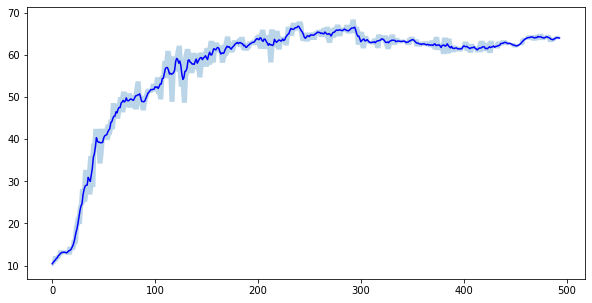

In [571]:
def avgslid(data, dx):
    avg = []
    lar = []
    sma = []
    n = 500
    for idx in range(n-dx):
        avg.append(sum(data[idx:idx+dx])/dx)
        lar.append(max(data[idx:idx+dx]))
        sma.append(min(data[idx:idx+dx]))
    res = []
    res.append(avg)
    res.append(lar)
    res.append(sma)
    return res
                   
ndata = avgslid(g, 6)
x = np.arange(500-6)

plt.figure(figsize=(10, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）
pre = 0

y = np.array(ndata[0]).astype(np.float) # 每个方法的值
y1 = np.array(ndata[1]).astype(np.float) # 每个方法的上界
y2 = np.array(ndata[2]).astype(np.float) # 每个方法的下界

plt.plot(x, y,color= 'b', linewidth=1.5, label="FedALP") #alp_mixed
plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.3
    ) #透明度
plt.show()

# 范围曲线

/home/xserver/anaconda3/envs/PFL/lib/python3.6/site-packages/ipykernel_launcher.py:112: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


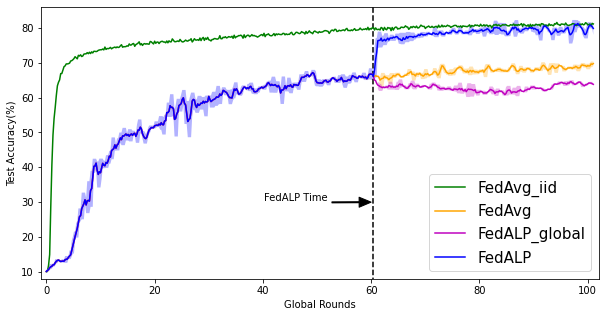

In [609]:
path = "./exp_save/"

aol = "acc"
# aol = "loss"

nbal = "0.1"

idx_data = 3

datas = [
    f"./exp_save/MNIST/MNIST_NN_{aol}.pkl",
    f"./exp_save/MNIST/MNIST_Net_{aol}.pkl",
    f"./exp_save/FashionMNIST/FashionMNIST_NN_{aol}.pkl",
    f"./exp_save/FashionMNIST/FashionMNIST_Net_{aol}.pkl",
    f"./exp_save/CIFAR10/CIFAR10_c3f2_nbal_{nbal}_{aol}.pkl",
    f"./exp_save/CIFAR10/CIFAR10_c5f3_nbal_{nbal}_{aol}.pkl"
]
names = [
    f"MNIST_NN_{aol}",
    f"MNIST_Net_{aol}",
    f"FashionMNIST_NN_{aol}",
    f"FashionMNIST_Net_{aol}",
    f"CIFAR10_c3f2_nbal_{nbal}_{aol}",
    f"CIFAR10_c5f3_nbal_{nbal}_{aol}"
]

name = names[idx_data]
datas = datas[idx_data]
data = np.array(pickle.load(open(datas, 'rb')), dtype=object)

dx = 4

fed = data[0]
nfed = avgslid(fed, dx)

iid = data[1][:500-dx]

g = data[2]
ng = avgslid(g, dx)

local = data[3]

mixed = data[4]
nmixed = avgslid(mixed, dx)

c_g = data[5]
c_p = data[6]

####################################绘图################################

plt.figure(figsize=(10, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0
x = np.arange(500-dx)

plt.plot(iid[pre:],  color= 'g', linewidth=1.5, label="FedAvg_iid")   #iid

# plt.plot(fed[pre:],  color= 'orange', linewidth=1.5, label="FedAvg")       #avg
y = np.array(nfed[0]).astype(np.float) # 每个方法的值
y1 = np.array(nfed[1]).astype(np.float) # 每个方法的上界
y2 = np.array(nfed[2]).astype(np.float) # 每个方法的下界
plt.plot(x, y, color= 'orange', linewidth=1.5, label="FedAvg")
plt.fill_between(x[300:], y1[300:], y2[300:], #上限，下限
        facecolor='orange', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.3
    ) #透明度


# plt.plot(g[pre:],    color= 'm', linewidth=1.5, label="FedALP_global")#alp_global
y = np.array(ng[0]).astype(np.float) # 每个方法的值
y1 = np.array(ng[1]).astype(np.float) # 每个方法的上界
y2 = np.array(ng[2]).astype(np.float) # 每个方法的下界
plt.plot(x, y,color= 'm', linewidth=1.5, label="FedALP_global")
plt.fill_between(x[300:], y1[300:], y2[300:], #上限，下限
        facecolor='m', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.3
    ) #透明度


# plt.plot(mixed[pre:],color= 'b', linewidth=1.5, label="FedALP") #alp_mixed
y = np.array(nmixed[0]).astype(np.float) # 每个方法的值
y1 = np.array(nmixed[1]).astype(np.float) # 每个方法的上界
y2 = np.array(nmixed[2]).astype(np.float) # 每个方法的下界
plt.plot(x, y,color= 'b', linewidth=1.5, label="FedALP") #alp_mixed
plt.fill_between(x, y1, y2, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.3
    ) #透明度


# plt.plot(local[pre:],color= 'r', linewidth=1.5, label="fed_alp_local") #alp_local

# plt.plot(c_g[:], color= 'y', linewidth=2,label="cluster_only_g")
# plt.plot(c_p[:], color= 'y', linewidth=2,label="cluster_only_p")



#设置X轴标签
plt.xlabel("Global Rounds")
#设置Y轴标签
plt.ylabel("Test Accuracy(%)")

#设置坐标轴显示间隔
# plt.xticks(np.arange(0, 121, step=30))
# plt.yticks(np.arange(0, 81, step=10))

name_list = ('0', '20', '40', '60', '80', '100')
pos_list = [0,98,196,294,392,490]
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))

#设置显示区域
plt.xlim(xmin = -5, xmax=500)
plt.ylim(ymin = 8, ymax=86)

font1 = {
    'weight' : 'normal',
    'size'   : 15,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框

# plt.legend(loc = "upper right", prop=font1) # 设置信息框

groupx = 297
#箭头注释
plt.annotate('FedALP Time', xy=(groupx-1, 30), xytext=(groupx-100, 30.5),arrowprops=dict(facecolor='black', width = 1, headwidth=10,shrink=0.05))
#设置竖直虚线
plt.vlines(296, 0, 110, colors = "black", linestyles = "--")


# print(len(fed))
# print(len(iid))
# print(len(g))
# print(len(local))
# print(len(mixed))
# print(len(c_p))
# print(len(c_g))

# with open(f"./exp_save/FashionMNIST/FashionMNIST_Net_{aol}.pkl", "wb") as output:
#     pickle.dump(data, output)

# plt.savefig(f"./pic/{name}.png", dpi=300, bbox_inches='tight')

# 正常曲线

fed: 55.0
iid: 65.815
global: 51.391752577319586
fedalp: 67.78522336769758
c_g: 46.66838487972509
c_p: 95.85051546391753


Text(57, 32.5, 'FedALP Time')

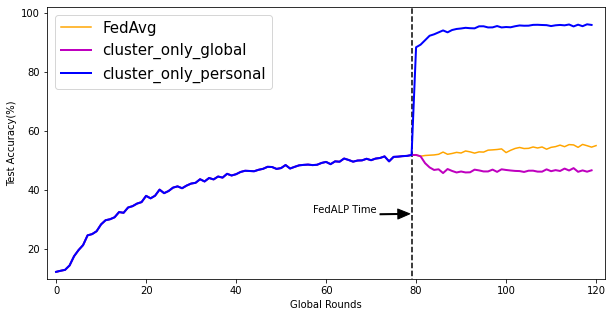

In [633]:
path = "./exp_save/"

aol = "acc"
# aol = "loss"

nbal = "0.001"

idx_data = 4

datas = [
    f"./exp_save/MNIST/MNIST_NN_{aol}.pkl",
    f"./exp_save/MNIST/MNIST_Net_{aol}.pkl",
    f"./exp_save/FashionMNIST/FashionMNIST_NN_{aol}.pkl",
    f"./exp_save/FashionMNIST/FashionMNIST_Net_{aol}.pkl",
    f"./exp_save/CIFAR10/CIFAR10_c3f2_nbal_{nbal}_{aol}.pkl",
    f"./exp_save/CIFAR10/CIFAR10_c5f3_nbal_{nbal}_{aol}.pkl"
]
names = [
    f"MNIST_NN_{aol}",
    f"MNIST_Net_{aol}",
    f"FashionMNIST_NN_{aol}",
    f"FashionMNIST_Net_{aol}",
    f"CIFAR10_c3f2_nbal_{nbal}_{aol}",
    f"CIFAR10_c5f3_nbal_{nbal}_{aol}"
]

name = names[idx_data]
datas = datas[idx_data]
data = np.array(pickle.load(open(datas, 'rb')), dtype=object)

xr = 6

fed = data[0]
print(f"fed: {sum(fed[-xr:])/xr}")
iid = data[1]
print(f"iid: {sum(iid[-xr:])/xr}")
g = data[2]
print(f"global: {max(g[-xr:])}")
local = data[3]
mixed = data[4]
print(f"fedalp: {sum(mixed[-xr:])/xr}")
c_g = data[5]
print(f"c_g: {sum(c_g[-xr:])/xr}")
c_p = data[6]
print(f"c_p: {sum(c_p[-xr:])/xr}")

# dy = 0
# for idx in range(80,120):
#     c_g[idx] -= dy
#     dy += 0.15

####################################绘图################################

plt.figure(figsize=(10, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

pre = 0

# plt.plot(iid[pre:],  color= 'g', linewidth=1.5, label="FedAvg_iid")   #iid
plt.plot(fed[pre:],  color= 'orange', linewidth=1.5, label="FedAvg")       #avg
# plt.plot(g[pre:],    color= 'm', linewidth=1.5, label="FedALP_global")#alp_global
# plt.plot(mixed[pre:],color= 'b', linewidth=1.5, label="FedALP") #alp_mixed
# plt.plot(local[pre:],color= 'r', linewidth=1.5, label="fed_alp_local") #alp_local

plt.plot(c_g[:], color= 'm', linewidth=2,label="cluster_only_global")
plt.plot(c_p[:], color= 'b', linewidth=2,label="cluster_only_personal")


#设置X轴标签
plt.xlabel("Global Rounds")
#设置Y轴标签
plt.ylabel("Test Accuracy(%)")

# #设置坐标轴显示间隔
# plt.xticks(np.arange(0, 121, step=30))
# plt.yticks(np.arange(0, 81, step=10))

# name_list = ('0', '20', '40', '60', '80', '100')
# pos_list = [0,100,200,300,400,500]
# ax = plt.axes()
# ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
# ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))

#设置显示区域
plt.xlim(xmin = -2, xmax=122)
plt.ylim(ymin = 10, ymax=102)

font1 = {
    'weight' : 'normal',
    'size'   : 15,
}
plt.legend(loc = "upper left", prop=font1) # 设置信息框

# plt.legend(loc = "upper right", prop=font1) # 设置信息框

groupx = 79
#设置竖直虚线
plt.vlines(groupx, 0, 110, colors = "black", linestyles = "--")
#箭头注释
plt.annotate('FedALP Time', xy=(groupx, 32), xytext=(groupx-22, 32.5),arrowprops=dict(facecolor='black', width = 1, headwidth=10,shrink = 0.05))



# print(len(fed))
# print(len(iid))
# print(len(g))
# print(len(local))
# print(len(mixed))
# print(len(c_p))
# print(len(c_g))

# with open(f"./exp_save/FashionMNIST/FashionMNIST_Net_{aol}.pkl", "wb") as output:
#     pickle.dump(data, output)

# plt.savefig(f"./pic/cluster_only_{name}.png", dpi=300, bbox_inches='tight')

In [357]:
 def picgen(idx_data = 0, nbal = "0.001"):
    path = "./exp_save/"

    aol = "acc"
    # aol = "loss"

#     nbal = "0.1"

#     idx_data = 5

    datas = [
        f"./exp_save/MNIST/MNIST_NN_{aol}.pkl",
        f"./exp_save/MNIST/MNIST_Net_{aol}.pkl",
        f"./exp_save/FashionMNIST/FashionMNIST_NN_{aol}.pkl",
        f"./exp_save/FashionMNIST/FashionMNIST_Net_{aol}.pkl",
        f"./exp_save/CIFAR10/CIFAR10_c3f2_nbal_{nbal}_{aol}.pkl",
        f"./exp_save/CIFAR10/CIFAR10_c5f3_nbal_{nbal}_{aol}.pkl"
    ]
    names = [
        f"MNIST_NN_{aol}",
        f"MNIST_Net_{aol}",
        f"FashionMNIST_NN_{aol}",
        f"FashionMNIST_Net_{aol}",
        f"CIFAR10_c3f2_nbal_{nbal}_{aol}",
        f"CIFAR10_c5f3_nbal_{nbal}_{aol}"
    ]

    name = names[idx_data]
    datas = datas[idx_data]
    data = np.array(pickle.load(open(datas, 'rb')), dtype=object)

    fed = data[0]
    iid = data[1]
    g = data[2]
    local = data[3]
    mixed = data[4]
    c_g = data[5]
    c_p = data[6]

    ####################################绘图################################

    plt.figure(figsize=(10, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

    pre = 0

    plt.plot(iid[pre:],  color= 'g', linewidth=1.5, label="FedAvg_iid")   #iid
    plt.plot(fed[pre:],  color= 'orange', linewidth=1.5, label="FedAvg")       #avg
    plt.plot(g[pre:],    color= 'm', linewidth=1.5, label="FedALP_global")#alp_global
    plt.plot(mixed[pre:],color= 'b', linewidth=1.5, label="FedALP") #alp_mixed
    # plt.plot(local[pre:],color= 'r', linewidth=1.5, label="fed_alp_local") #alp_local

    # plt.plot(c_g[:], color= 'y', linewidth=2,label="cluster_only_g")
    # plt.plot(c_p[:], color= 'y', linewidth=2,label="cluster_only_p")

    #设置竖直虚线
    plt.vlines(79, 0, 100, colors = "black", linestyles = "--")

    #设置X轴标签
    plt.xlabel("Global Rounds")
    #设置Y轴标签
    plt.ylabel("Test Accuracy(%)")

    #设置坐标轴显示间隔
    plt.xticks(np.arange(0, 121, step=30))
    plt.yticks(np.arange(0, 81, step=10))

    #设置显示区域
    plt.xlim(xmin = 0, xmax=123)
    plt.ylim(ymin = 10, ymax=75)

    font1 = {
        'weight' : 'normal',
        'size'   : 15,
    }
    plt.legend(loc = "lower right", prop=font1) # 设置信息框

    # plt.legend(loc = "upper right", prop=font1) # 设置信息框

    groupx = 80
    #箭头注释
    plt.annotate('FedALP Time', xy=(groupx-1, 30), xytext=(groupx-25, 30.5),arrowprops=dict(facecolor='black', width = 1, headwidth=10,shrink=0.05))



    # print(len(fed))
    # print(len(iid))
    # print(len(g))
    # print(len(local))
    # print(len(mixed))
    # print(len(c_p))
    # print(len(c_g))

    # with open(f"./exp_save/FashionMNIST/FashionMNIST_Net_{aol}.pkl", "wb") as output:
    #     pickle.dump(data, output)

    plt.savefig(f"./pic/{name}.png", dpi=300, bbox_inches='tight')

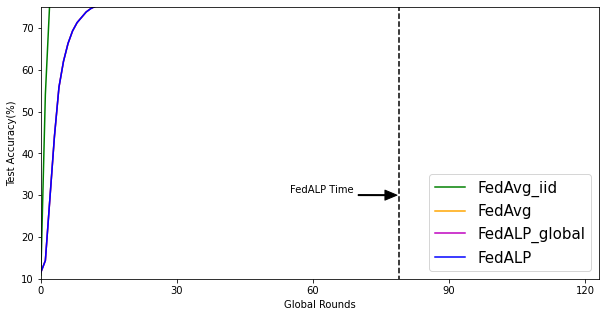

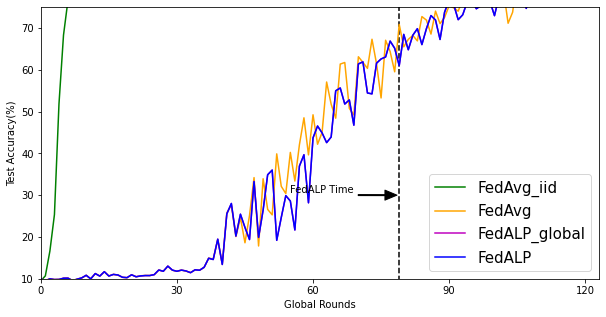

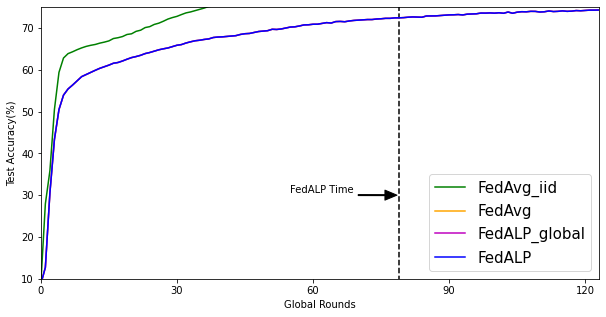

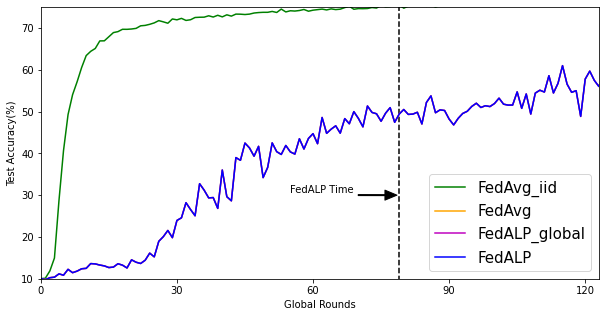

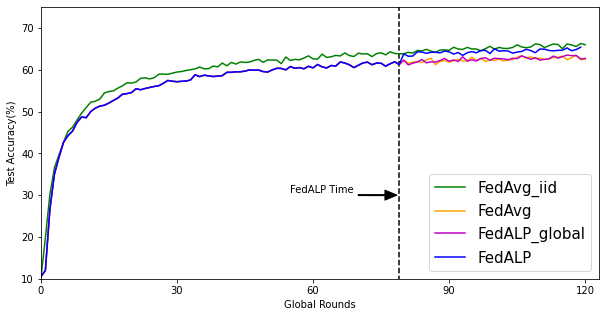

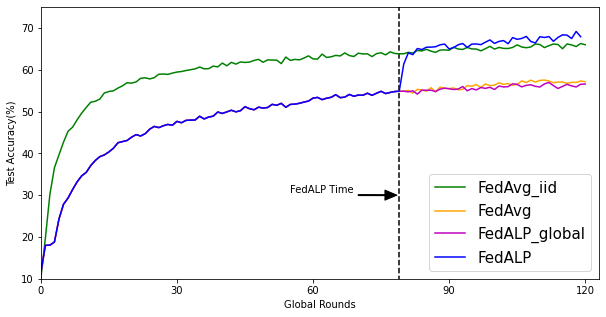

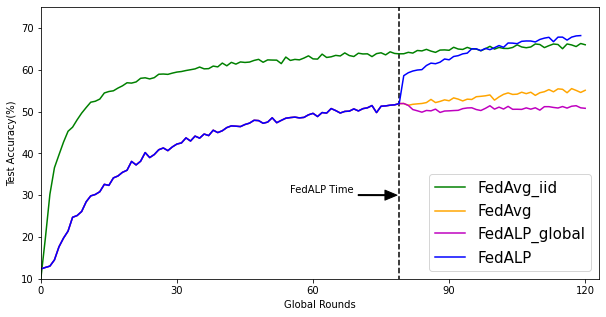

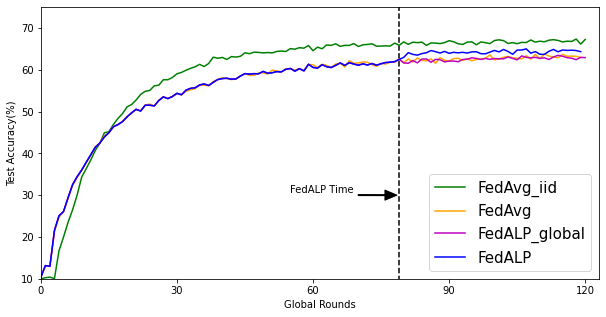

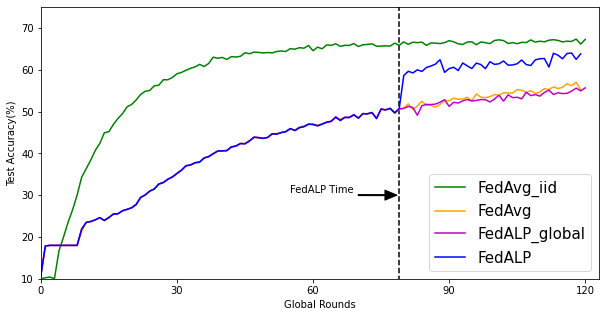

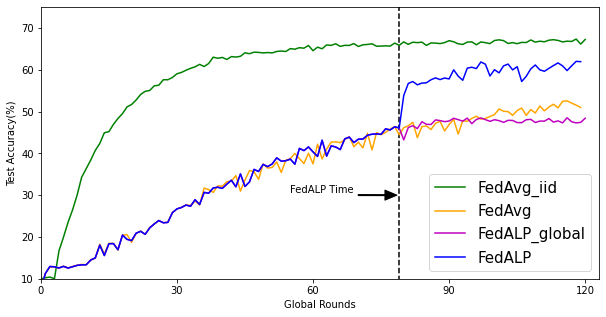

In [359]:
picgen(4,0.1)
picgen(4,0.01)
picgen(4,0.001)
picgen(5,0.1)
picgen(5,0.01)
picgen(5,0.001)


In [171]:
table = np.array(pickle.load(open("./exp_save/clusters_stable_list.pkl", 'rb')), dtype=object)
print(table)

[list([[999, 91], [999, 75], [999, 54], [999, 48], [999, 33], [999, 30], [999, 5]])
 list([[999, 76], [999, 61], [999, 56], [999, 46], [999, 42], [999, 27], [999, 22], [999, 16], [999, 6]])
 list([[999, 98], [999, 87], [999, 80], [999, 71], [999, 29], [999, 17], [999, 12], [999, 4]])
 list([[999, 86], [999, 64], [999, 62], [999, 55], [999, 52], [999, 45], [999, 35], [999, 15], [999, 8], [49, 78]])
 list([[999, 94], [999, 89], [999, 83], [999, 81], [999, 44], [999, 37], [999, 36], [999, 24], [999, 9], [999, 3]])
 list([[999, 92], [999, 79], [999, 70], [999, 69], [999, 53], [999, 47], [999, 43], [999, 39], [999, 19], [999, 11], [999, 7]])
 list([[999, 93], [999, 67], [999, 60], [999, 59], [999, 51], [999, 50], [999, 49], [999, 28], [999, 26], [999, 23], [999, 20], [999, 13]])
 list([[994, 99], [994, 74], [994, 10], [994, 14], [994, 34], [994, 58], [994, 73], [994, 41], [994, 82], [994, 90], [994, 0], [202, 38], [5, 81], [5, 44], [5, 94], [5, 37], [5, 36], [5, 83], [5, 24], [5, 89], [5, 9

[list([[999, 91], [999, 75], [999, 54], [999, 48], [999, 33], [999, 30], [999, 5]])
 list([[999, 76], [999, 61], [999, 56], [999, 46], [999, 42], [999, 27], [999, 22], [999, 16], [999, 6]])
 list([[999, 98], [999, 87], [999, 80], [999, 71], [999, 29], [999, 17], [999, 12], [999, 4]])
 list([[999, 86], [999, 64], [999, 62], [999, 55], [999, 52], [999, 45], [999, 35], [999, 15], [999, 8], [49, 78]])
 list([[999, 94], [999, 89], [999, 83], [999, 81], [999, 44], [999, 37], [999, 36], [999, 24], [999, 9], [999, 3]])
 list([[999, 92], [999, 79], [999, 70], [999, 69], [999, 53], [999, 47], [999, 43], [999, 39], [999, 19], [999, 11], [999, 7]])
 list([[999, 93], [999, 67], [999, 60], [999, 59], [999, 51], [999, 50], [999, 49], [999, 28], [999, 26], [999, 23], [999, 20], [999, 13]])
 list([[994, 99], [994, 74], [994, 10], [994, 14], [994, 34], [994, 58], [994, 73], [994, 41], [994, 82], [994, 90], [994, 0], [202, 38], [5, 81], [5, 44], [5, 94], [5, 37], [5, 36], [5, 83], [5, 24], [5, 89], [5, 9

/home/xserver/anaconda3/envs/PFL/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


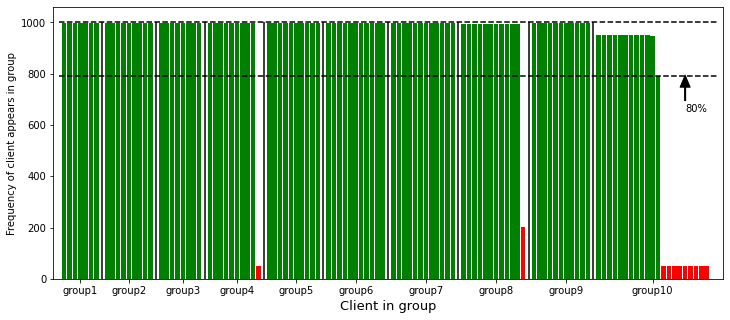

In [322]:
print(table)
xx = 0

plt.figure(figsize=(12, 5)) # 设置整个图像的尺寸（长高分别为6、5个单位）

edg = []

for ta in table:
    for len in ta:
        if len[0]>760:
            plt.bar(xx,len[0],color="green",width = 0.85)
            xx += 1
        elif len[0]>10:
            plt.bar(xx,len[0],color="red",width = 0.85)
            xx += 1
#     plt.bar(xx,1000,color="black",width = 0.5)
    edg.append(xx)
    xx += 1
plt.hlines(1000, -1, 121, colors = "black", linestyles = "dashed")
plt.hlines(792, -1, 121, colors = "black", linestyles = "dashed")

for idx in edg[:-1]:
    plt.vlines(idx, 0, 1000, colors = "black")

name_list = ('group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7', 'group8', 'group9', 'group10')
pos_list = [3,12,22,32,43,54,67,80,93,109]
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))

#箭头注释
plt.annotate('80%', xy=(115, 800), xytext=(115, 650),arrowprops=dict(facecolor='black', width = 1, headwidth=10,shrink=0.05))

#设置显示区域
plt.xlim(xmin = -2, xmax=122)
plt.ylim(ymin = 0, ymax=1060)

#设置X轴标签
plt.xlabel("Client in group", fontsize=13)
#设置Y轴标签
plt.ylabel("Frequency of client appears in group")

# plt.savefig("./pic/"+'group.png', dpi=300, bbox_inches='tight')